# Jan 2023 Cu B with absorption

IPTS-29196

| |January Cu-B dTHF no EtOH | Cu-K dTHF + EtOH|Cu-F dTHF + dEtOH|Cu-G THF + dEtOH|
|---|---|---|---|---|
|OCV 1| 201282 |207268|207161|207194|
|CP 1| 201289| 207275|207168|207201|
|OCV 2| 201290 |207282|207169|207202|
|OCV 3|201298|207296|207177|207210|
|OCV 4|201306|207304|207187|207218|
|OCV 5|201334|| |



In [36]:
import sys
import os
import time
import numpy as np
np.random.seed(42)

import json

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
git_dir = os.path.join(os.path.expanduser('~'), 'git', 'nh3-analysis')

from refl1d.names import *
from refl1d import errors

from bumps.fitters import fit

import importlib

import copper_sample as cu
importlib.reload(cu)

<module 'copper_sample' from '/Users/mathieu/git/nh3-analysis/jan2023/notebooks/copper_sample.py'>

# OCV 2

Using THF SLD =  6.1
Using Cu SLD =  6.5
# steps: 589, # draws: 100130
step 1 cost 52.004(97)
                               intensity .......|..          1 in (0.5,1.15)
                           THF interface ..|.......    54.1601 in (1,220)
                           SEI interface ..|.......    9.74001 in (1,35)
                                 SEI rho ...|......        2.5 in (0,7)
                           SEI thickness ....|.....        300 in (100,550)
                      material interface .|........    9.74001 in (5,33)
                           material irho ....|.....  0.0999998 in (0,0.2)
                            material rho ..|.......    2.99999 in (1,8)
                      material thickness |.........    41.9999 in (40,200)
                            Cu interface ......|...      15.24 in (5,22)
                            Cu thickness ......|...    560.599 in (10,800)
                            Ti interface .........|          9 in (1,9)
                    

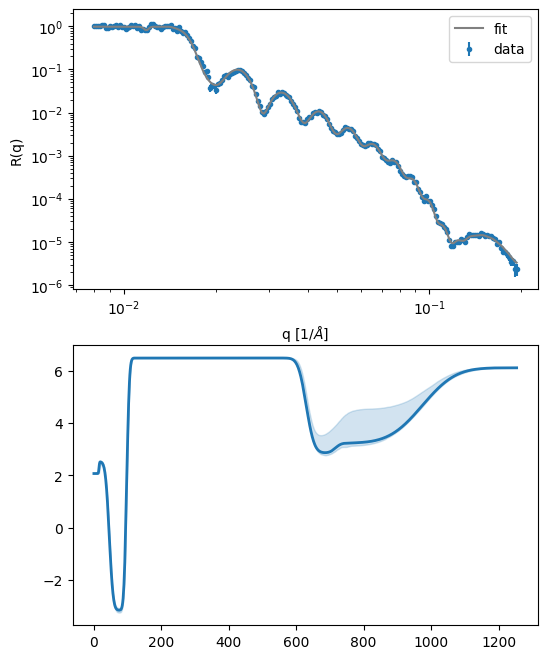

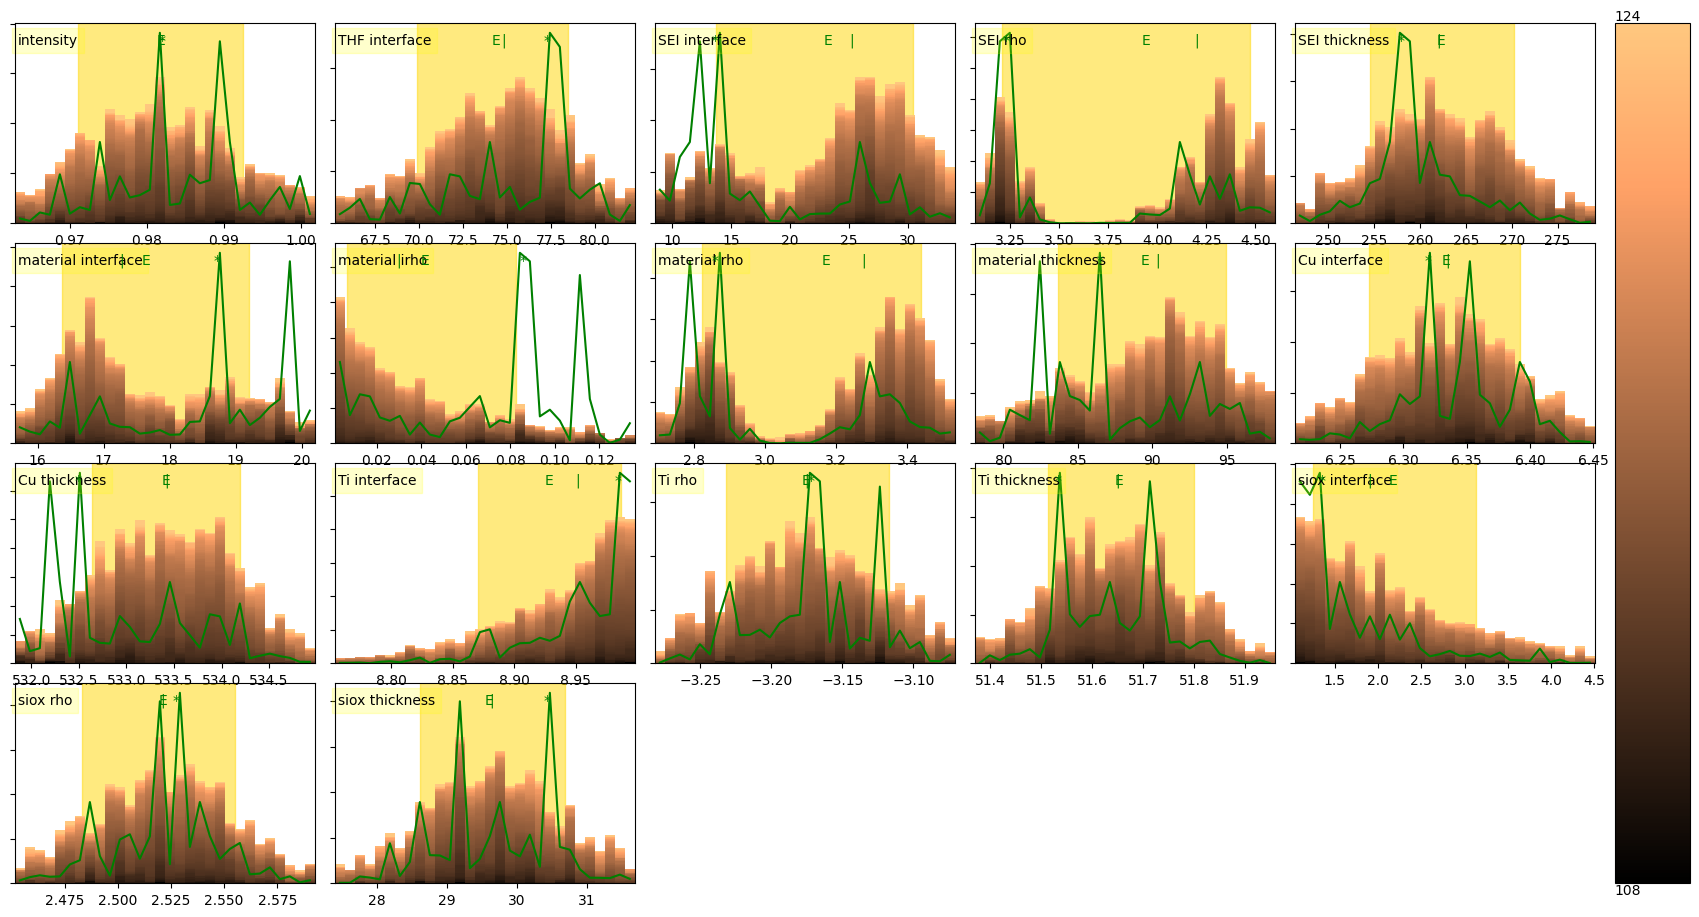

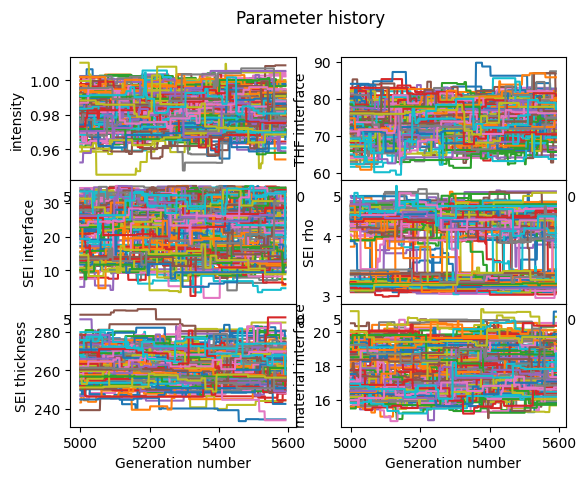

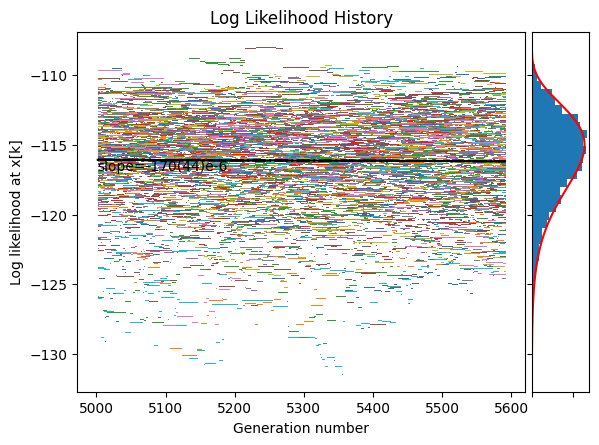

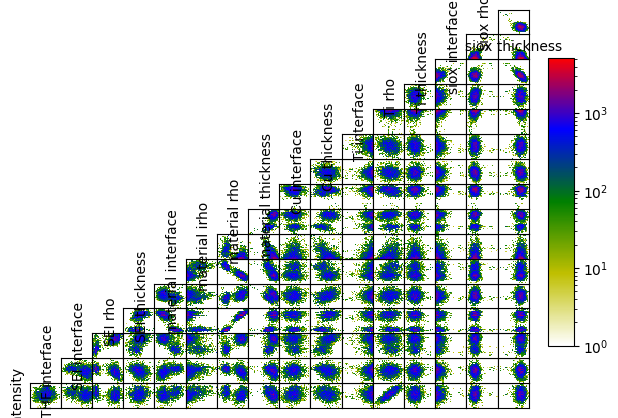

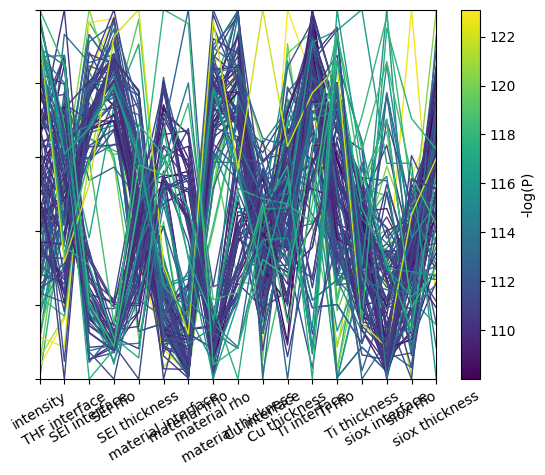

In [40]:
importlib.reload(cu)

thf_sld = 6.1240
cu_sld = 6.4962
print("Using THF SLD = %4.2g" % thf_sld)
print("Using Cu SLD = %4.2g" % cu_sld)



data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_201290_combined_data_auto.txt')
meas = cu.Measurement(data_file, n_sample=100000, fit_abs=True)
meas.thf_sld = thf_sld
meas.cu_sld = cu_sld
meas.get_experiment()


meas.fit()
meas.plot(portion=0.1)

table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '-abs')
refl1d_output = table_name.replace('.md', '')

meas.results.state.show(figfile=os.path.join(git_dir, 'jan2023', 'data', 'results', 'refl1d_output', refl1d_output))
cu.write_markdown_table(meas, os.path.join(git_dir, 'jan2023', 'data', 'results', table_name))

meas.problem.save(os.path.join(git_dir, 'jan2023', 'data', 'results', 'refl1d_output', refl1d_output))

# OCV 3


# steps: 59, # draws: 10030
step 1 cost 51.277(97)
                               intensity .......|..          1 in (0.5,1.15)
                           THF interface ..|.......      54.16 in (1,220)
                           SEI interface ..|.......    9.73998 in (1,35)
                                 SEI rho ...|......        2.5 in (0,7)
                           SEI thickness ....|.....        300 in (100,550)
                      material interface .|........    9.73998 in (5,33)
                           material irho ....|.....  0.0999998 in (0,0.2)
                            material rho ..|.......          3 in (1,8)
                      material thickness |.........    41.9999 in (40,200)
                            Cu interface ......|...      15.24 in (5,22)
                            Cu thickness ......|...    560.599 in (10,800)
                            Ti interface .........|          9 in (1,9)
                                  Ti rho ....|.....         -2 

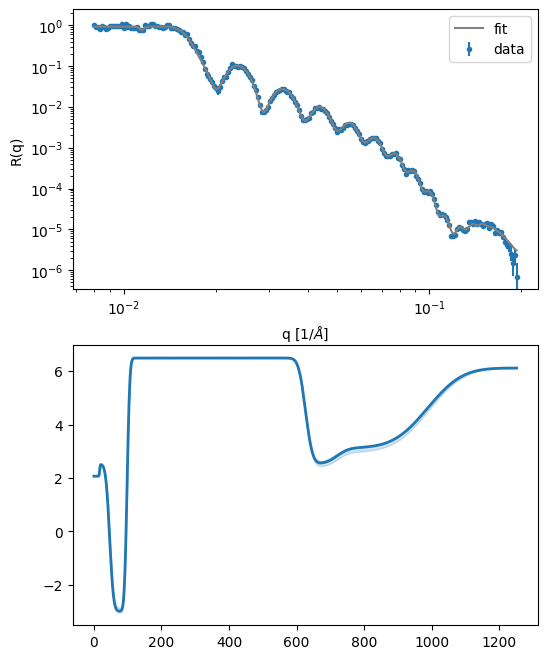

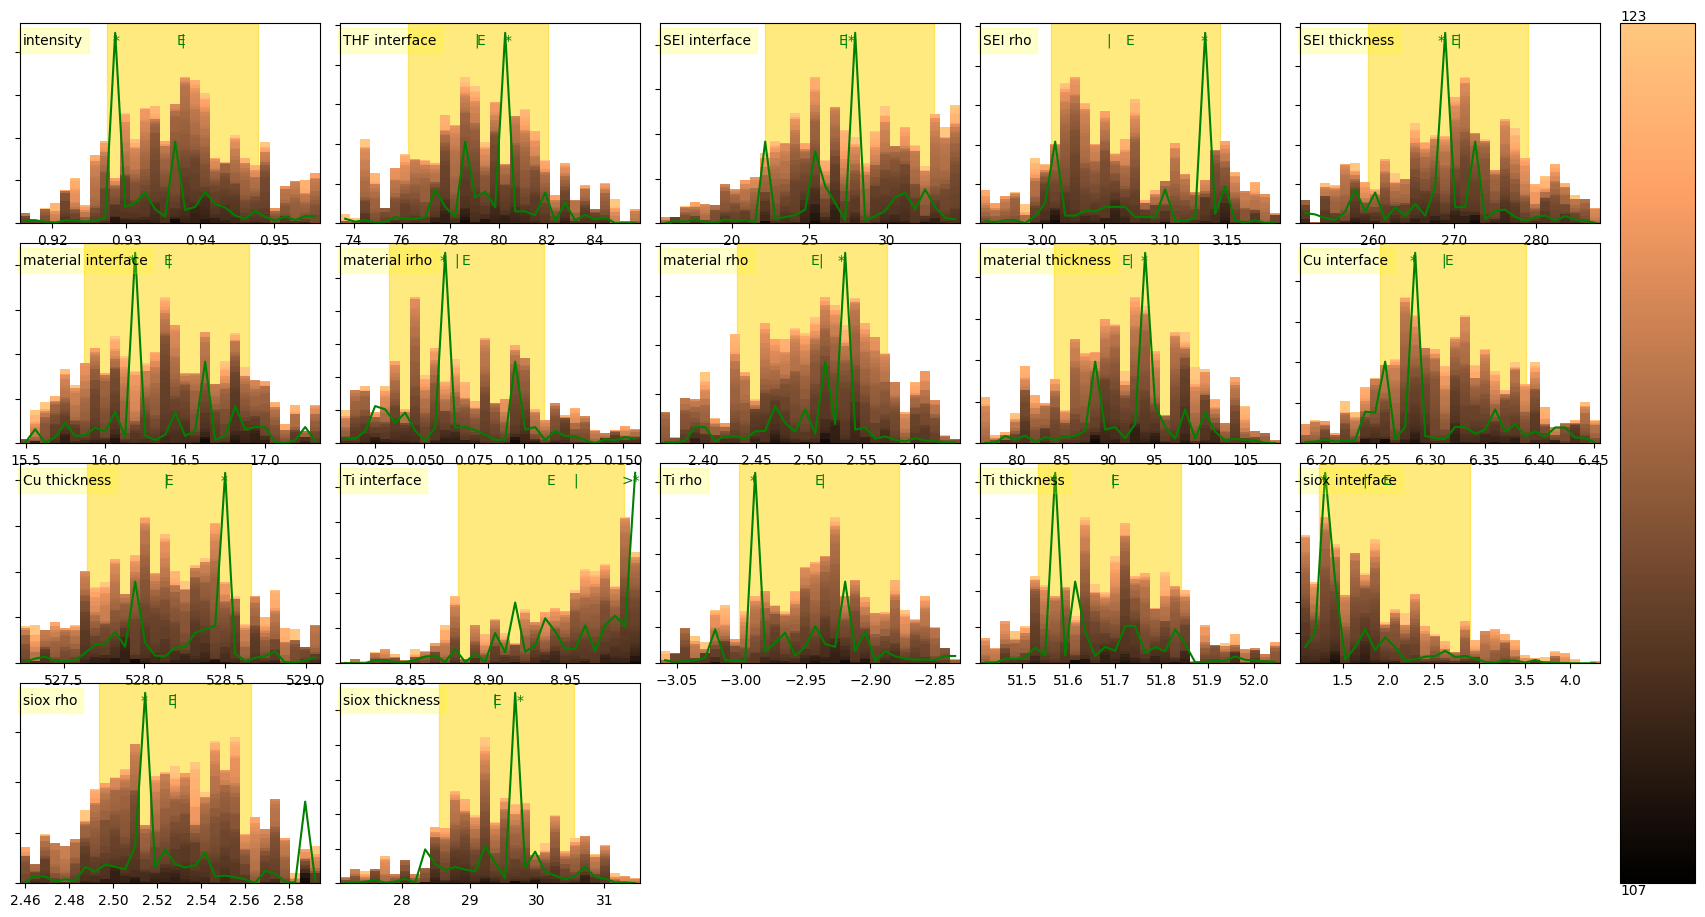

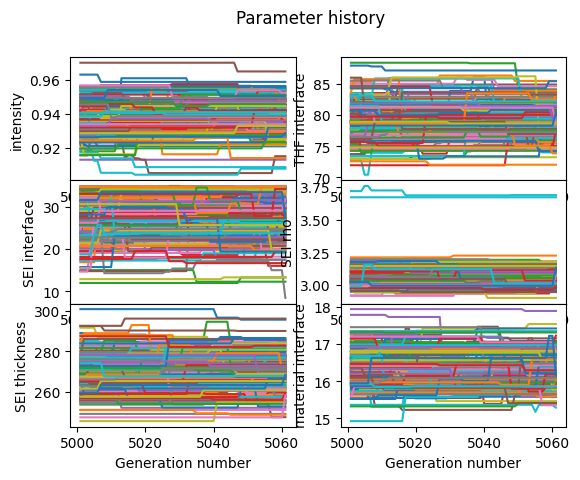

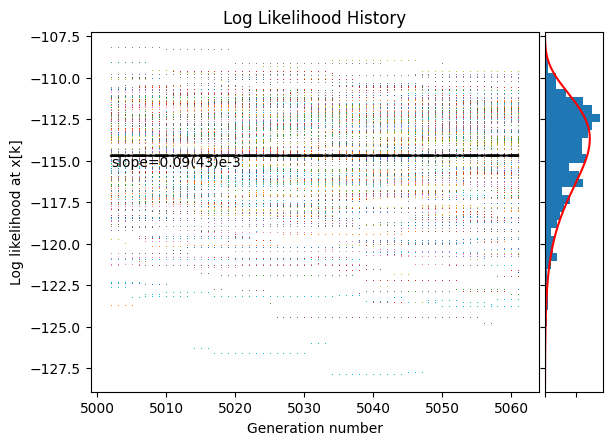

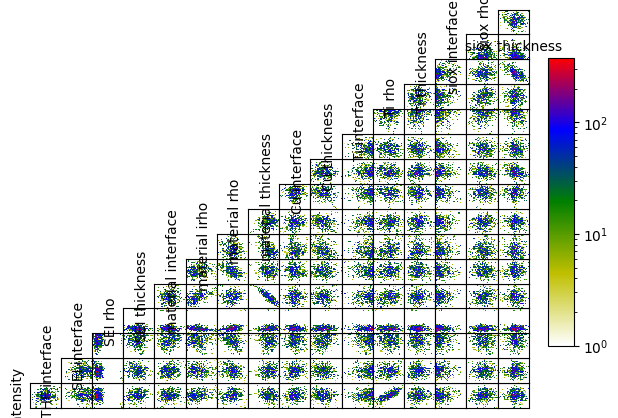

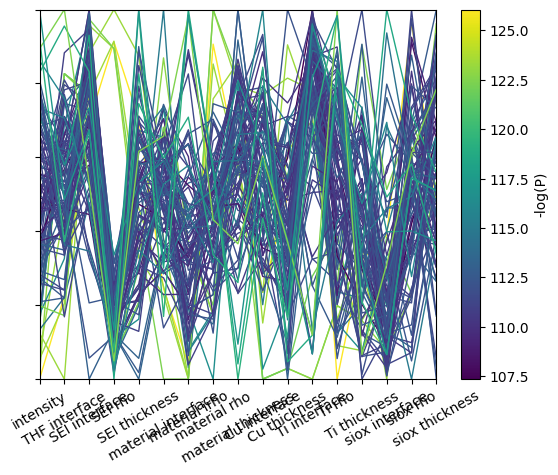

In [41]:
importlib.reload(cu)

data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_201298_combined_data_auto.txt')
meas = cu.Measurement(data_file, n_sample=10000, fit_abs=True)
meas.thf_sld = thf_sld
meas.cu_sld = cu_sld

meas.fit()
meas.plot(portion=1)
meas.results.state.show()
table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '-abs')
cu.write_markdown_table(meas, os.path.join(git_dir, 'jan2023', 'data', 'results', table_name))
refl1d_output = table_name.replace('.md', '')
meas.problem.save(os.path.join(git_dir, 'jan2023', 'data', 'results', 'refl1d_output', refl1d_output))

# OCV 4

# steps: 118, # draws: 20060
step 1 cost 41.555(97)
                               intensity ......|...          1 in (0.7,1.15)
                           THF interface ....|.....      54.16 in (1,120)
                           SEI interface .........|         35 in (1,35)
                                 SEI rho .......|..          3 in (0,4)
                           SEI thickness ..|.......        233 in (100,550)
                      material interface ..|.......       9.74 in (1,35)
                           material irho ....|.....  0.0999999 in (0,0.2)
                            material rho ...|......          3 in (1,6.3)
                      material thickness .....|....        130 in (40,200)
                            Cu interface .....|....      15.24 in (1,25)
                            Cu thickness ........|.      560.6 in (400,600)
                            Ti interface .........|          9 in (1,9)
                                  Ti rho .....|....       -

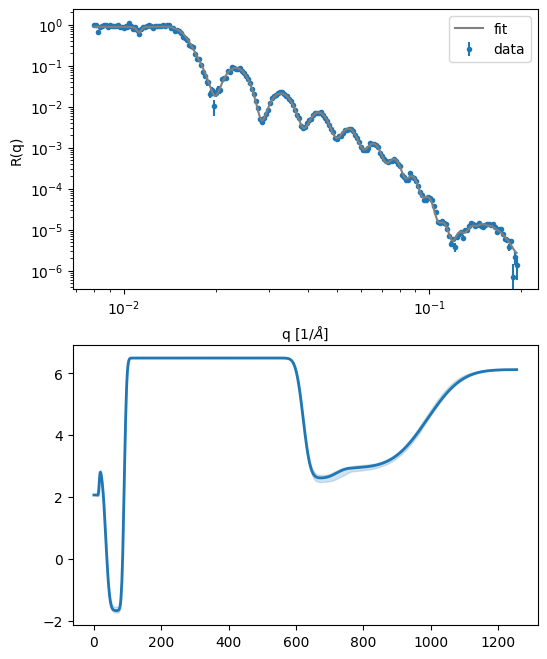

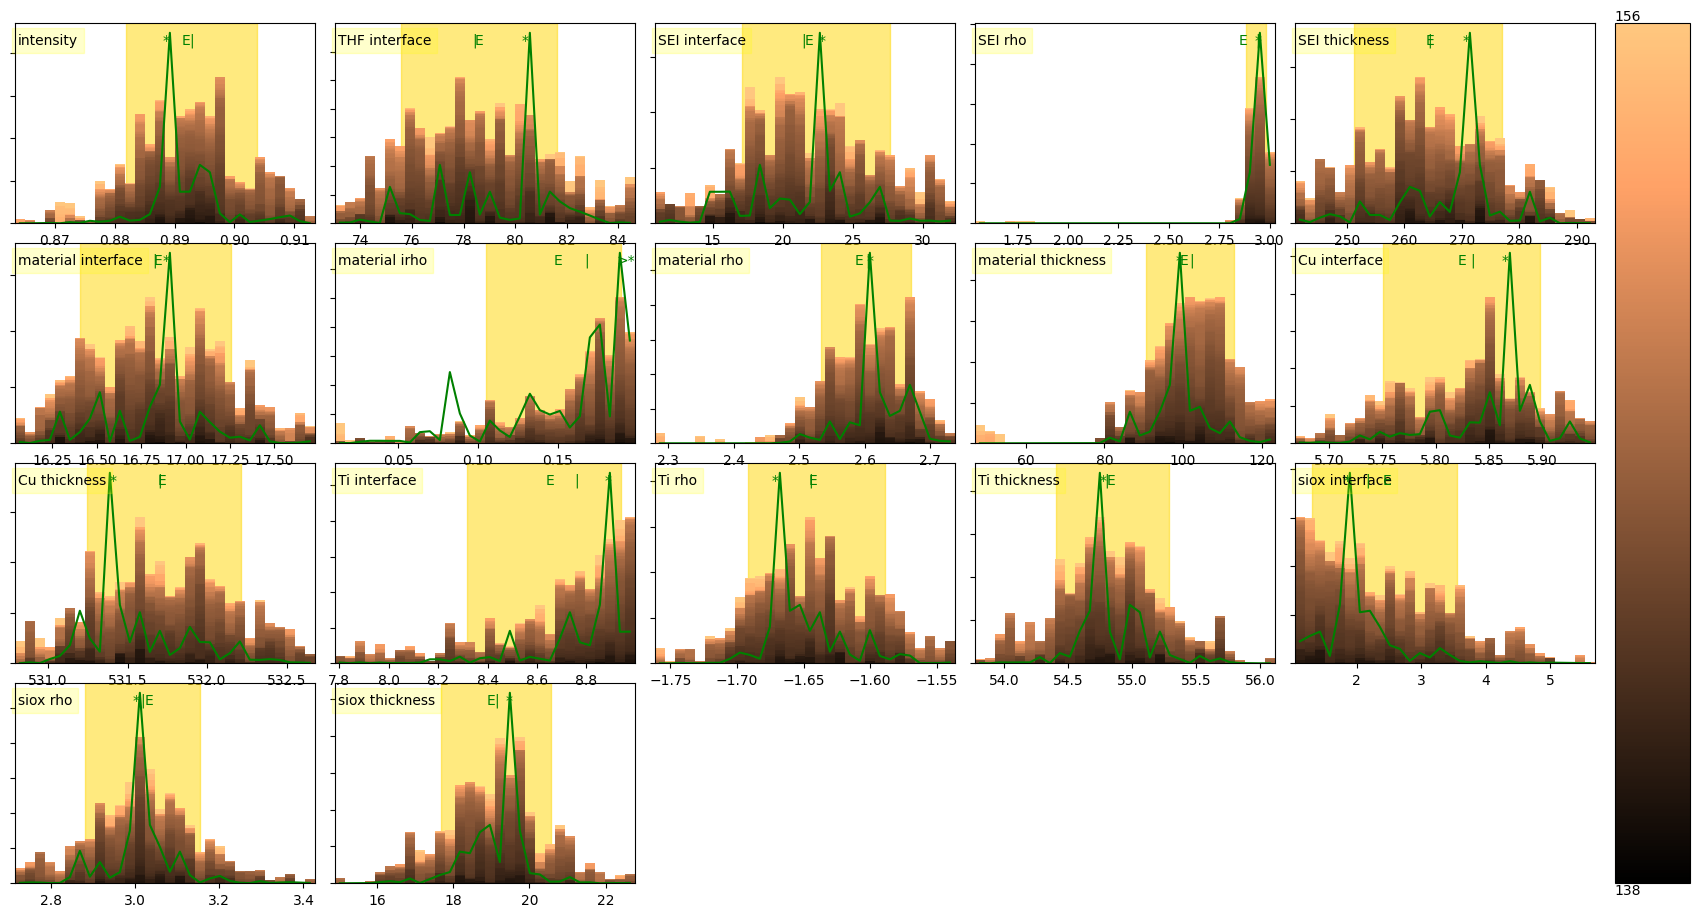

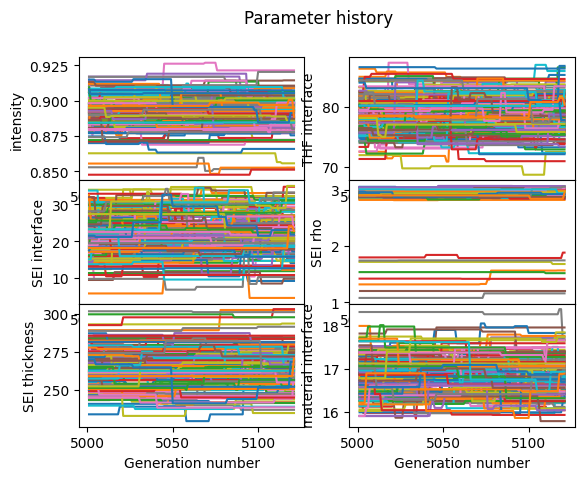

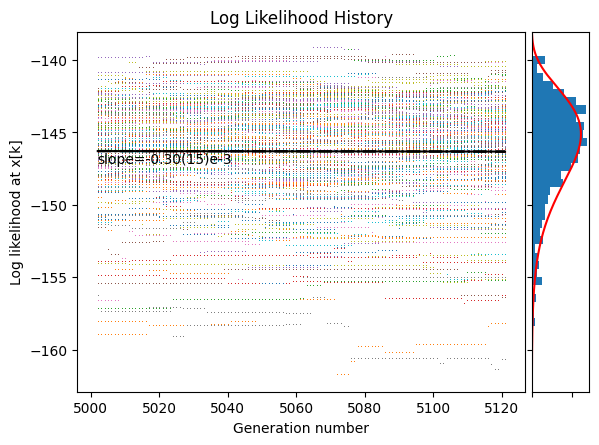

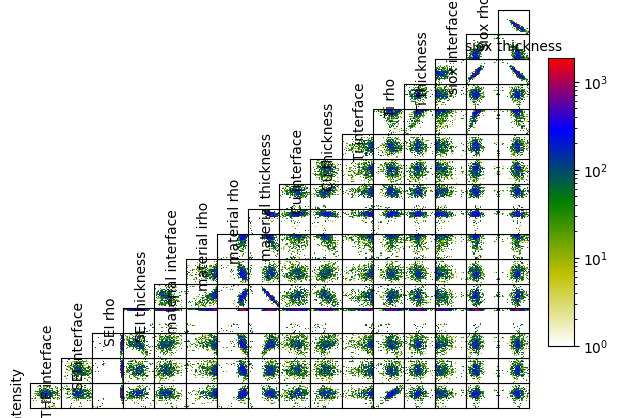

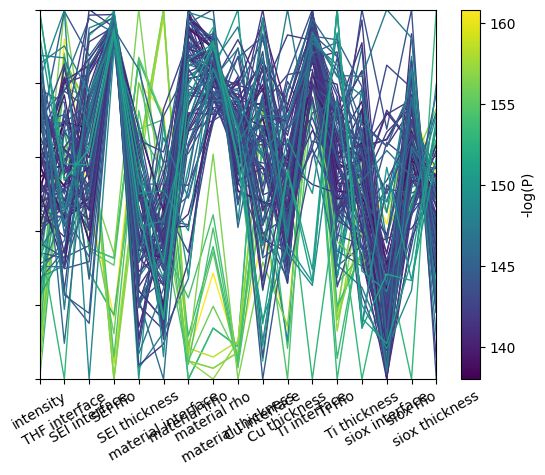

In [42]:
importlib.reload(cu)
thf_sld = 6.1240
cu_sld = 6.4962

data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_201306_combined_data_auto.txt')
meas = cu.Measurement_CuB(data_file, n_sample=20000, fit_abs=True)
meas.thf_sld = thf_sld
meas.cu_sld = cu_sld

meas.fit()
meas.plot(portion=.1)
meas.results.state.show()
table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '-abs')
cu.write_markdown_table(meas, os.path.join(git_dir, 'jan2023', 'data', 'results', table_name))
refl1d_output = table_name.replace('.md', '')
meas.problem.save(os.path.join(git_dir, 'jan2023', 'data', 'results', 'refl1d_output', refl1d_output))

# OCV 5

# steps: 625, # draws: 100000
step 1 cost 43.844(91)
                               intensity .......|..          1 in (0.5,1.15)
                           THF interface ..|.......      54.16 in (1,220)
                           SEI interface ...|......       9.74 in (1,25)
                                 SEI rho ...|......    2.50001 in (0,7)
                           SEI thickness ....|.....        300 in (100,550)
                      material interface .|........    9.73998 in (5,33)
                            material rho ..|.......          3 in (1,8)
                      material thickness |.........    41.9998 in (40,200)
                            Cu interface ......|...      15.24 in (5,22)
                            Cu thickness ......|...    560.599 in (10,800)
                            Ti interface .........|          9 in (1,9)
                                  Ti rho ....|.....         -2 in (-4,0)
                            Ti thickness ....|.....         51

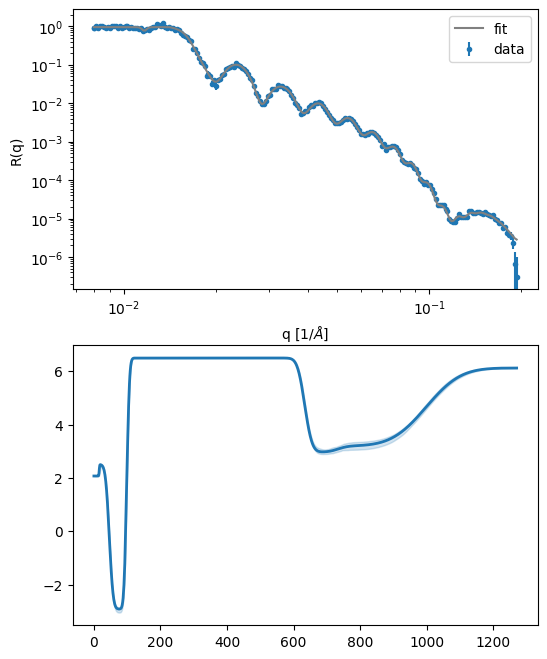

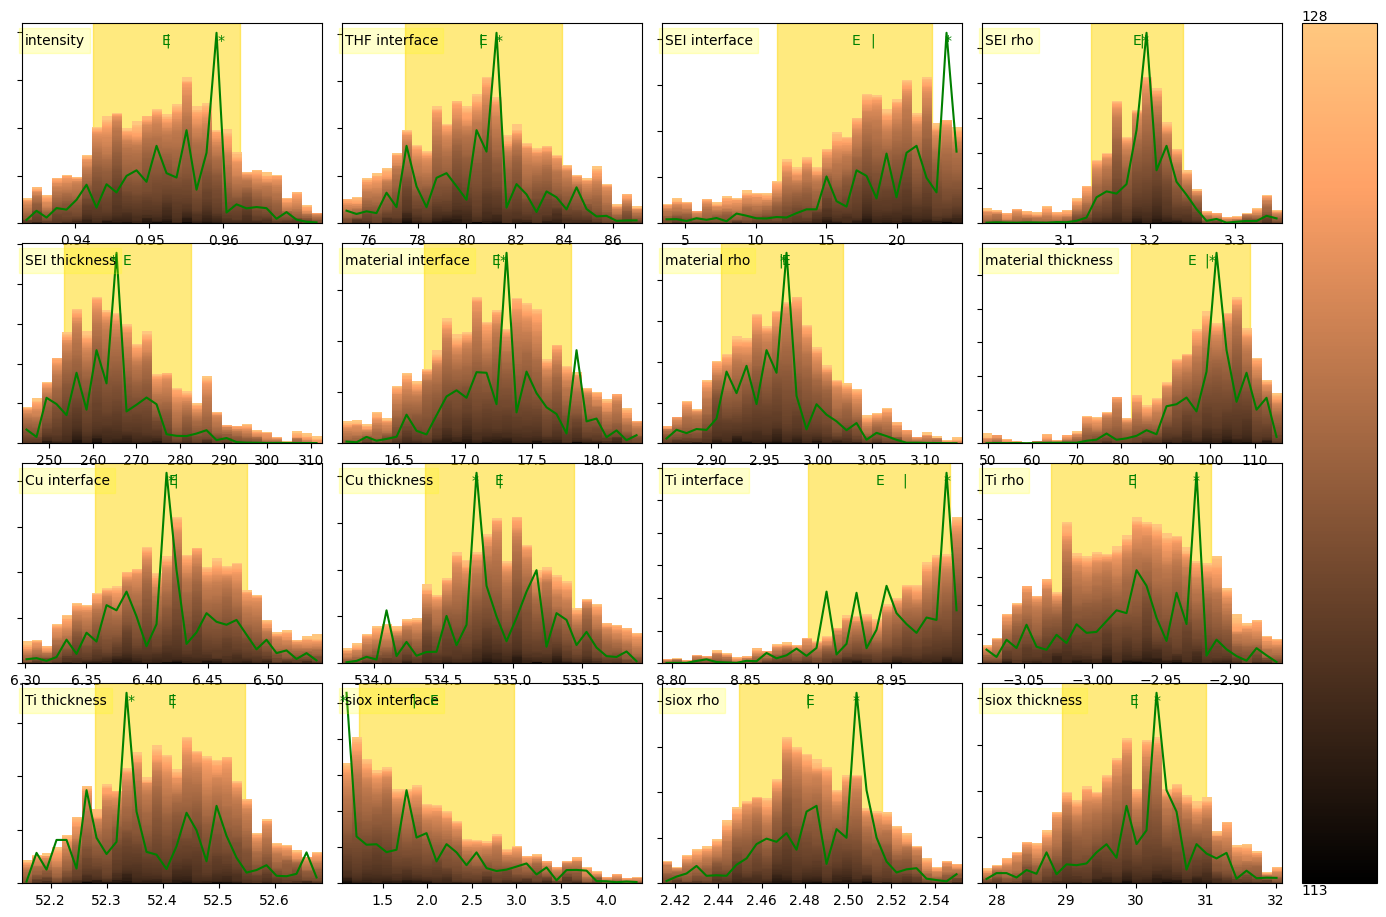

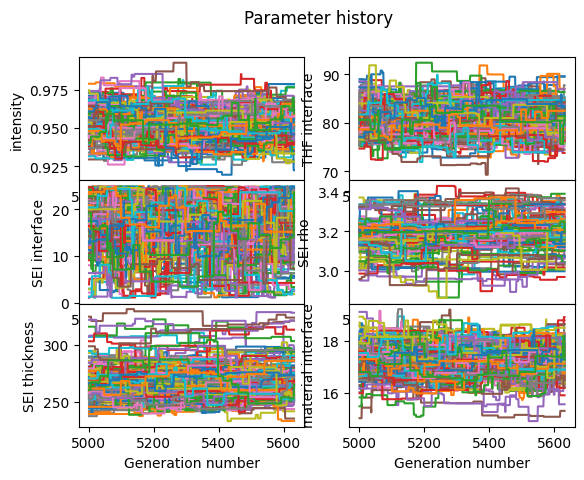

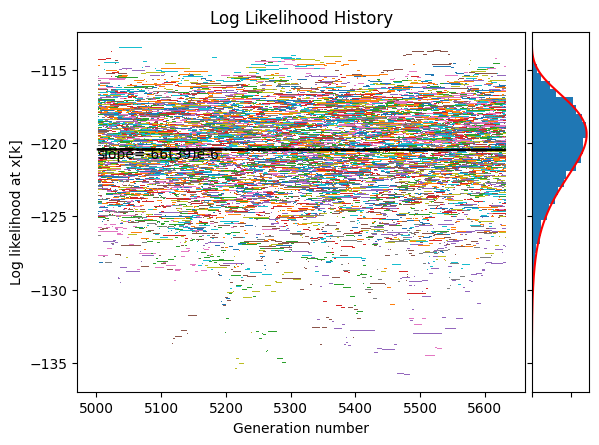

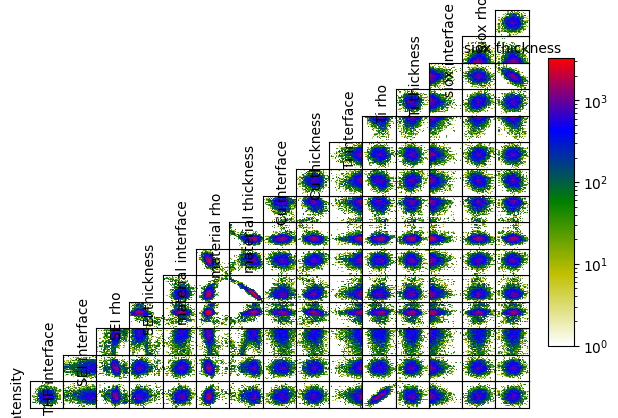

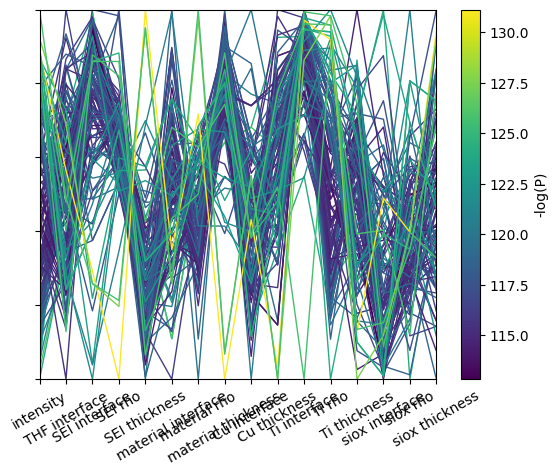

In [8]:
importlib.reload(cu)

data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_201334_combined_data_auto.txt')
meas = cu.Measurement(data_file, n_sample=100000, fit_abs=True)
meas.thf_sld = thf_sld
meas.cu_sld = cu_sld

meas.fit()
meas.plot(portion=.1)
meas.results.state.show()
table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '-abs')
cu.write_markdown_table(meas, os.path.join(git_dir, 'jan2023', 'data', 'results', table_name))
refl1d_output = table_name.replace('.md', '')
meas.problem.save(os.path.join(git_dir, 'jan2023', 'data', 'results', 'refl1d_output', refl1d_output))

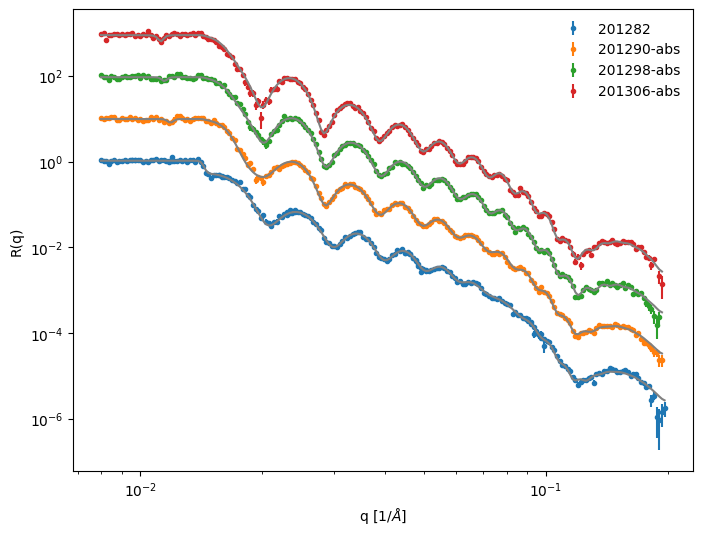

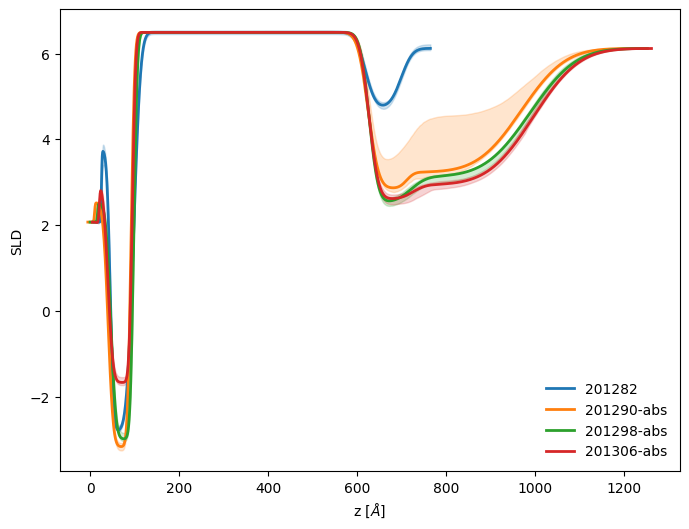

In [43]:
data_list = ['201282', '201290-abs', '201298-abs', '201306-abs']
z_offset = [10, -5, 0, 5]

fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

scale = 1
multiplier = 10
for run in data_list:
    _run = run.replace('-abs', '')
    data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_%s_combined_data_auto.txt' % _run)
    raw_data = np.loadtxt(data_file, skiprows=1).T
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    idx = raw_data[2] < raw_data[1]
    plt.errorbar(raw_data[0][idx], scale*raw_data[1][idx], yerr=scale*raw_data[2][idx], label=run, linestyle='', marker='.')

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(raw_data[0], scale*np.asarray(data['r_calc']), color='gray', label='', zorder=10)
    
    scale *= multiplier

plt.gca().legend(frameon=False)
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
plt.xscale('log')
plt.yscale('log')
plt.savefig('jan2023-Rq-Cu-B.png')


fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('z [$\AA$]')
plt.ylabel('SLD')
plt.savefig('jan2023-Cu-B.svg')
plt.savefig('jan2023-Cu-B.png')

# Comparison with and without absorption

Text(0, 0.5, 'SLD')

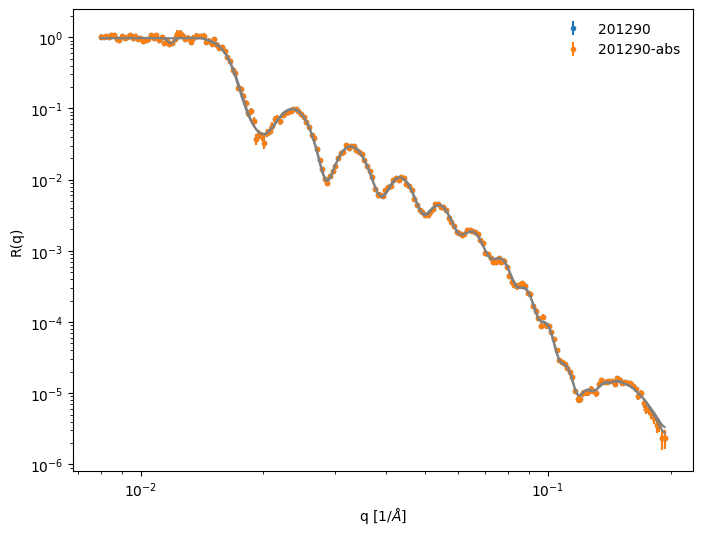

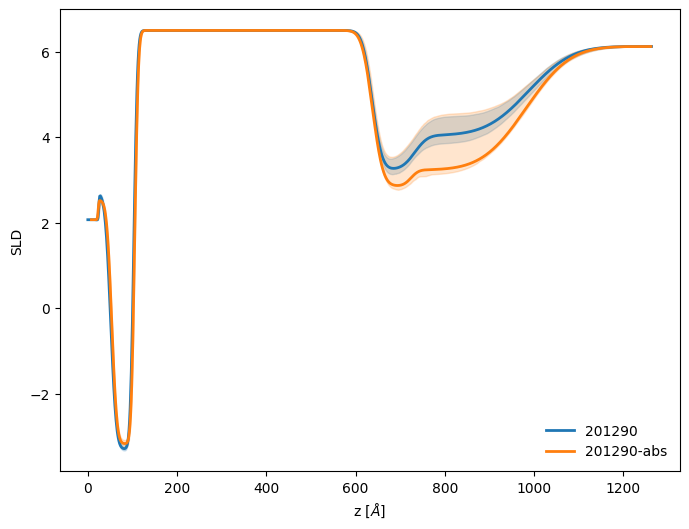

In [44]:
data_list = ['201282', '201290-abs', '201298-abs', '201306-abs']
data_list = ['201290', '201290-abs']
z_offset = [0, 8]

fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

scale = 1
multiplier = 1
for run in data_list:
    _run = run.replace('-abs', '')
    data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_%s_combined_data_auto.txt' % _run)
    raw_data = np.loadtxt(data_file, skiprows=1).T
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    idx = raw_data[2] < raw_data[1]
    plt.errorbar(raw_data[0][idx], scale*raw_data[1][idx], yerr=scale*raw_data[2][idx], label=run, linestyle='', marker='.')

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(raw_data[0], scale*np.asarray(data['r_calc']), color='gray', label='', zorder=10)
    
    scale *= multiplier

plt.gca().legend(frameon=False)
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
plt.xscale('log')
plt.yscale('log')



fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('z [$\AA$]')
plt.ylabel('SLD')


Text(0, 0.5, 'SLD')

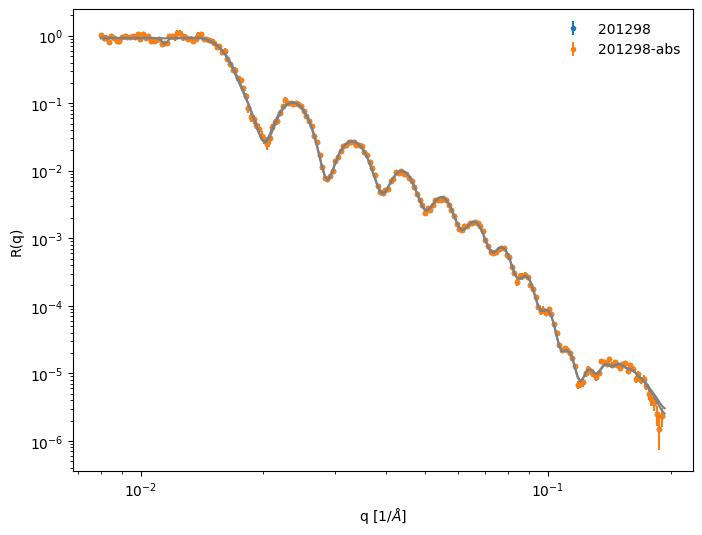

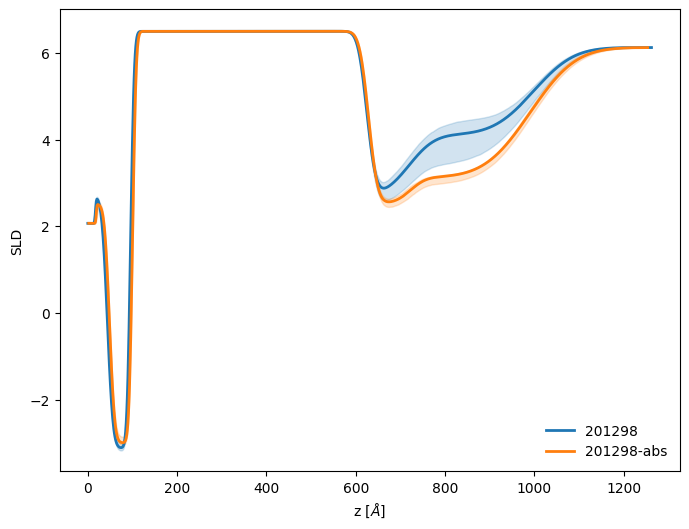

In [45]:
data_list = ['201282', '201290-abs', '201298-abs', '201306-abs']
data_list = ['201298', '201298-abs']
z_offset = [0, 2]

fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

scale = 1
multiplier = 1
for run in data_list:
    _run = run.replace('-abs', '')
    data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_%s_combined_data_auto.txt' % _run)
    raw_data = np.loadtxt(data_file, skiprows=1).T
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    idx = raw_data[2] < raw_data[1]
    plt.errorbar(raw_data[0][idx], scale*raw_data[1][idx], yerr=scale*raw_data[2][idx], label=run, linestyle='', marker='.')

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(raw_data[0], scale*np.asarray(data['r_calc']), color='gray', label='', zorder=10)
    
    scale *= multiplier

plt.gca().legend(frameon=False)
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
plt.xscale('log')
plt.yscale('log')



fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('z [$\AA$]')
plt.ylabel('SLD')


Text(0, 0.5, 'SLD')

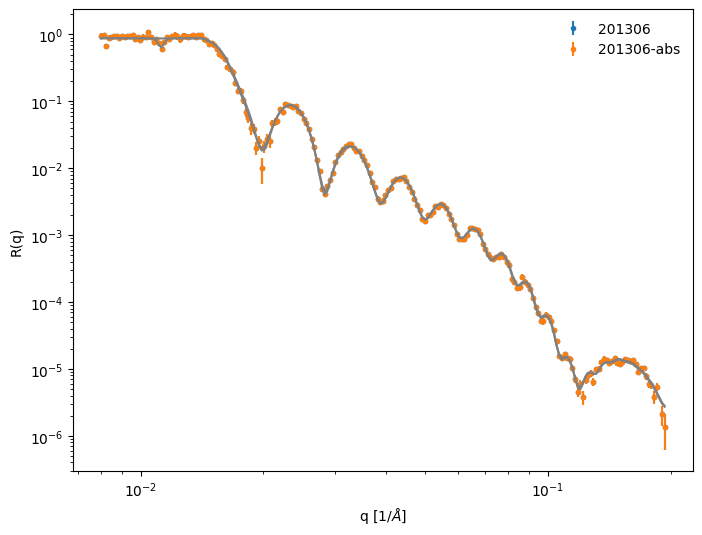

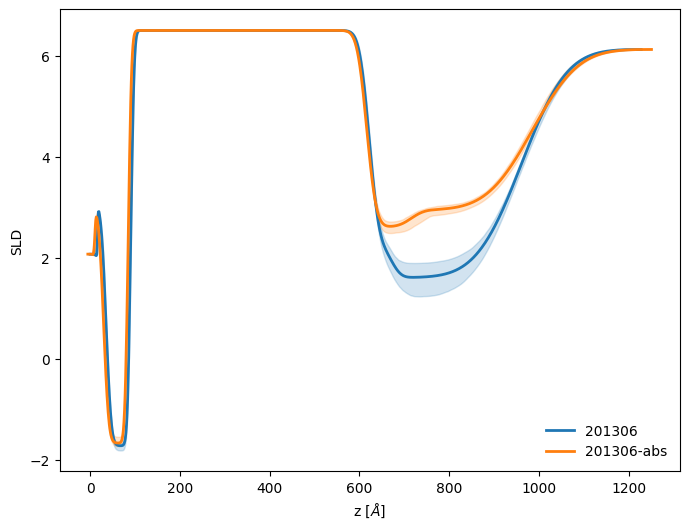

In [46]:
data_list = ['201282', '201290-abs', '201298-abs', '201306-abs']
data_list = ['201306', '201306-abs']
z_offset = [0, -5]

fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

scale = 1
multiplier = 1
for run in data_list:
    _run = run.replace('-abs', '')
    data_file = os.path.join(git_dir, 'jan2023', 'data', 'reduced', 'REFL_%s_combined_data_auto.txt' % _run)
    raw_data = np.loadtxt(data_file, skiprows=1).T
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    idx = raw_data[2] < raw_data[1]
    plt.errorbar(raw_data[0][idx], scale*raw_data[1][idx], yerr=scale*raw_data[2][idx], label=run, linestyle='', marker='.')

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(raw_data[0], scale*np.asarray(data['r_calc']), color='gray', label='', zorder=10)
    
    scale *= multiplier

plt.gca().legend(frameon=False)
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
plt.xscale('log')
plt.yscale('log')



fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('z [$\AA$]')
plt.ylabel('SLD')
